# **TECHNOCOLABS MINI PROJECT ✨BIGMART SALES ANALYSIS✨**

AUTHOR : **GOBIKHA KRISHNAMOORTHY** 
           from **MACHINE LEARNING ENGINEER INTERN TEAM** 

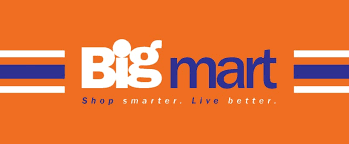

# THE PLAN OF THE PROJECT :    


---

---




1.THE PROBLEM STATEMENT 

2.HYPOTHESIS GENERATION

3.IMPORTING THE LIBRARIES

4.LOADING THE DATASETS

5.DATA STRUCTURE AND CONENT

6.UNIVARIATE ANALYSIS

7.EDA AND PREPROCESSING OF THE DATA

8.BIVARIATE AND MULTIVARIATE ANALYSIS

9.FEATURE ENGINEERING

10.BUILDING THE MODELS USING ML

11.SAVING THE MODEL

12.SUMMARY



---

---






# 1).PROBLEM STATEMENT :     

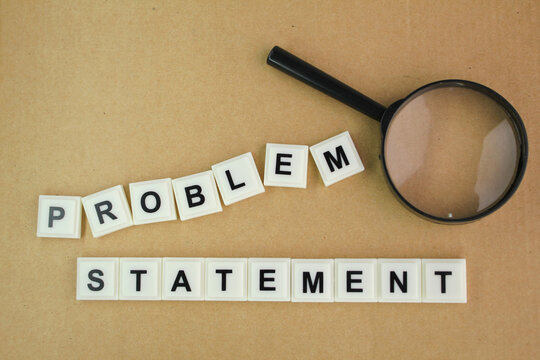

**The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.**


---


###  🦾 AIM OF THE PROJECT 🦾

**The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.**


---


### ⭐ DATASET DESCRIPTION ⭐

* The project datasets have been divided into two the **TRAIN** and the **TEST** dataets where the former have 8523 rows and 12 columns and the later have 5681 rows and 11 columns.

* We could find that the target column in the train set is **Item_Outlet_Sales** where it is the sales of the items in the particular outputs.

* **Item_Identifier** ---  These are set of unique values to access the items.

* **Item_Weight** --- Weights of the individual items.

* **Item_Fat_Content** --- Tells about the fat content present in each items.

* **Item_Visibility** --- The percentage of display area of the items.

* **Item_Type** --- It is the products that are kept for sale.

* **Item_MRP** --- The Maximun Retail Price for every item in a store.

* **Outlet_Identifier** --- These are unique number to identify the Outlets.

* **Outlet_Establishment_Year** --- The year in which the Outlet was estabilshed.

* **Outlet_Size** --- The Area or the Size of the Outlet.

* **Outlet_Location_Type** --- The location Type of a Outlet.

* **Outlet_Type** --- Tells about the type whether its a super market or a grocery store.



# 2).HYPOTHESIS GENERATION :    

**Sales of a particular product are influenced by its price.**

**EXPLANATION :  The price of a product may influence customer purchasing decisions, with higher prices leading to lower sales, and lower prices leading to higher sales.**

# 3).IMPORTING THE LIBRARIES  :     

**Here we are importing the required libraries like Numpy,Pandas,Matplotlib,Seaborn which are used in the data loading,data cleaning and data preprocessing processes.**



In [1]:
# For file handling and usage
import numpy as np
import pandas as pd
import warnings

# For data visualization purposes
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

# To handle the Missing and null values
from sklearn.impute import SimpleImputer

# For the Data Preprocessing and Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# For building the machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

# For evaluating the models using the metrics
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

# To avoid Warings
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

# 4).LOADING THE DATASETS :

* **The two TRAIN and the TEST datasets have been  uploaded separately as train and test into the environment.**

*  **Here The datasets have been uploaded directly and the colab is mounted with the the drive.**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# Mounting my google drive to the Google Colab Notebook where the dataset have been uploaded already.
# So that we need not upload the dataset every time the runtime is disconnected.

Mounted at /content/drive


In [3]:
train = pd.read_csv("/content/drive/MyDrive/DataSets/BigMart-Analysis/BigMart-DataSets/Train.csv")
# Reading the given  CSV dataset using the pandas libraries. 

In [4]:
test = pd.read_csv("/content/drive/MyDrive/DataSets/BigMart-Analysis/BigMart-DataSets/Test.csv")

# 5).DATA STRUCTURE AND CONTENT :    

**Here we intend to see the Data types and Structures present in the DataSet using the functions in the Pandas Library.**

In [5]:
train.shape
# Here .shape returns the number of rows and columns present in the given dataset.

(8523, 12)

In [6]:
test.shape
# The same thing which is done with the train set we have doing it with the test set also.

(5681, 11)

In [7]:
train.dtypes
# The function .dtypes returns the data type of each column of the dataframe. 

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [9]:
train.columns
# .columns returns the list of columns present in the dataframe. 

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

* From the above outputs we found that there are only THREE data types which are **OBJECT(STRING),FLOAT(DECIMALS) and INT(INTEGERS)**.

* It is seen that the column **Item_Outlet_Sales** is absent in the test set where we have to predict it by trainning the model using the train set.
 
* It is also visible from the.shape cell where the train has 12 columns and test has only 11.



In [11]:
train.info()
# .info() function displays a summary of the dataframe including the number of non-null values, the data type of each column, and the memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


* We can see that all columns except two have non-null values in both the test as well as the train sets.

* Those are Item_Weight and Outlet_Size where the first is of integer datatype and the latter is of object.

In [13]:
train.describe()
#  The above function returns a summary of the numerical columns of the dataframe including count, mean, standard deviation, minimum, maximum values and the IQR percentilies. 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [15]:
train.isnull().sum()
# The .isnull.sum() returns the number of missing values in each column of the dataframe.

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

* The above output clearly tell us that the both cell have null values present in them which has to be treated in the EDA process.

In [17]:
duplicates = train.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool


In [18]:
test.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Length: 5681, dtype: bool

In [19]:
train.head()
# The .head() function gives the first few rows of the dataframe.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In the **Item_Fat_Content** column it is found that is has some repetitve values which have cleared.

In [25]:
#train set
train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)
#test
test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

#check result
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# 6).UNIVARIATE ANALYSIS :    

* Univariate analysis is a statistical analysis technique that involves examining a single variable separately.

* The purpose of univariate analysis is to summarize and describe the characteristics of a single variable in the dataset. 

* It helps in understanding the distribution of data and detecting outliers, skewness, and other statistical anomalies.

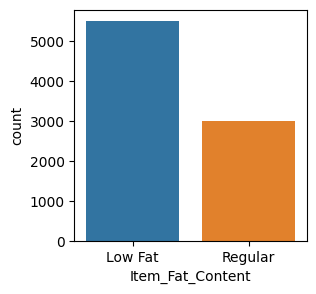

In [27]:
plt.figure(figsize=(3,3))
sns.countplot(x='Item_Fat_Content' , data=train)
plt.xlabel('Item_Fat_Content')
plt.show()
# A countplot to show the Item_Fat_Content column graphically.

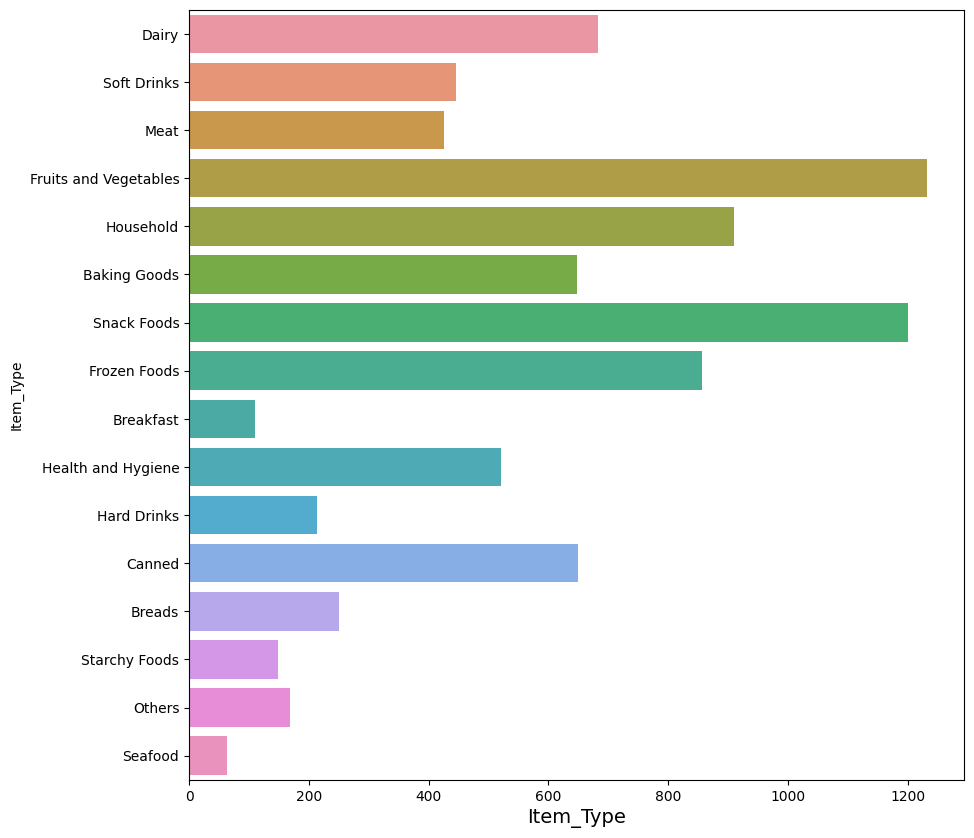

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(y='Item_Type' , data=train)
plt.xlabel('Item_Type', fontsize=14)
plt.show()
# A count plot to see which item_type has the most counts in it.

* It is seen that the item type Friuts and Vegetables have the first highest count.

* Followed by the Snack food and the Household are the second hoghest in count.

* The item type Sea food and Breakfast are very low in count compared to the others in the column.

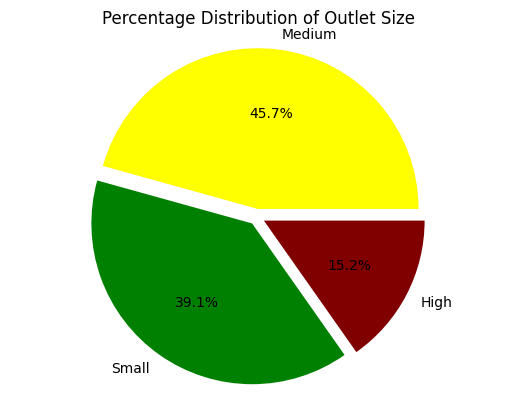

In [34]:
# Calculate the percentage distribution of Outlet_Size categories
outlet_size_dist = train['Outlet_Size'].value_counts(normalize=True) * 100
explode = (0.05,0.05,0.05)
colors=("yellow","green","maroon")
# Create a pie chart
plt.pie(outlet_size_dist, labels=outlet_type_dist.index, autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('Percentage Distribution of Outlet Size')
plt.axis('equal')
plt.show()

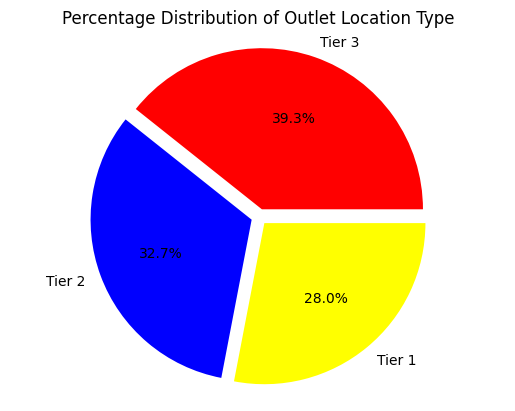

In [37]:
# Calculate the percentage distribution of Outlet_Location_Type categories
outlet_loc_type_dist = train['Outlet_Location_Type'].value_counts(normalize=True) * 100
explode = (0.05,0.05,0.05)
colors=("red","blue","yellow")
# Create a pie chart
plt.pie(outlet_loc_type_dist, labels=outlet_loc_type_dist.index, autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('Percentage Distribution of Outlet Location Type')
plt.axis('equal')
plt.show()

In [38]:
# Creating a backup copy for the train daatset before we intend to change it.
train_df= train.copy()

In [39]:
# Creating a backup copy for the test daatset before we intend to change it.
test_df = test.copy()

# 7).EXPLARATORY DATA ANALYSIS :    

It is a process of analyzing and summarizing data sets to extract insights, detect patterns, spot anomalies, and test hypotheses with the help of statistical and visualization methods.

This process can help in identifying potential problems in the data such as missing values, outliers, and inconsistencies, which can then be addressed before building a predictive model.

**1) ENCODING THE CATEGORICAL VALUES USING LABEL ENCODER :**



In [40]:
# Coverting the labels into a numeric form using Label Encoder for the TRAIN SET.
le=LabelEncoder()
for col in train_df.columns:
    if train_df[col].dtype=='object':
        train_df[col]=le.fit_transform(train_df[col])

In [41]:
train_df["Item_Type"].dtypes

dtype('int64')

In [42]:
# Coverting the labels into a numeric form using Label Encoder for the TEST SET.
le=LabelEncoder()
for col in test_df.columns:
    if test_df[col].dtype=='object':
        test_df[col]=le.fit_transform(test_df[col])

In [43]:
test_df["Outlet_Type"].dtypes

dtype('int64')

**2) HANDLING THE MISSING VALUES :**

In [45]:
# create SimpleImputer object for mean imputation in the TRAIN SET
imputer = SimpleImputer(strategy='mean')

# select columns with missing values
cols_with_missing = ["Item_Weight", 'Outlet_Size']

# impute missing values in selected columns
train_df[cols_with_missing] = imputer.fit_transform(train_df[cols_with_missing])

In [46]:
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [47]:
# create SimpleImputer object for mean imputation in the TEST SET
imputer = SimpleImputer(strategy='mean')

# select columns with missing values
cols_with_missing = ["Item_Weight", 'Outlet_Size']

# impute missing values in selected columns
test_df[cols_with_missing] = imputer.fit_transform(test_df[cols_with_missing])

In [48]:
test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

**3) ANALYSING THE OUTLIERS IN THE NUMERICAL COLUMNS USING BOX PLOT METHOD :**

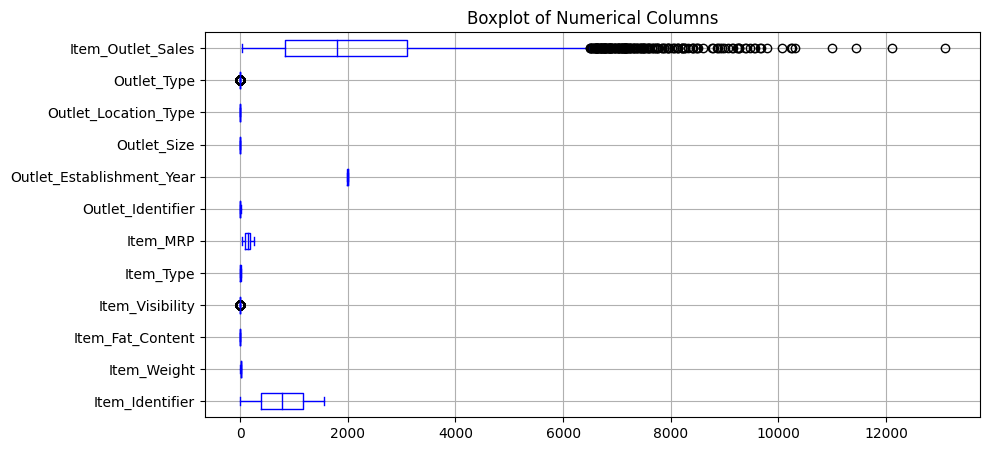

In [49]:
# IN THE TRAIN SET :
# Select the numerical columns
num_cols = train_df.select_dtypes(include=['int64', 'float64'])

# Create a boxplot for all the numerical columns
fig, ax = plt.subplots(figsize=(10, 5))
num_cols.boxplot(ax=ax, vert=False, color='blue') # vert=False states that the boxplot has to be in an horizontal view.
plt.title('Boxplot of Numerical Columns')
plt.show()

**FINDING THE OUTLIERS USING THE IQR METHOD :**

* IQR stands for Interquartile Range, which is a measure of variability used in statistical analysis. 

* It is calculated as the difference between the upper quartile (75th percentile) and the lower quartile (25th percentile) of a dataset. 

* IQR is often used to identify outliers in a dataset, as values that fall outside of 1.5 times the IQR above the upper quartile or below the lower quartile are considered to be outliers.

In [51]:
Q1 = np.percentile(train_df['Item_Outlet_Sales'], 25)
Q3 = np.percentile(train_df['Item_Outlet_Sales'], 75)
iqr = Q3 - Q1
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", iqr)

# Here we intend to find the Q1 and Q3 percentages of the Item_outlet_sales column which has a quite number of outliers using the numpy library.

# Calculate upper and lower limits
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr

print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

Q1: 834.2474
Q3: 3101.2964
IQR: 2267.049
Upper limit: 6501.8699
Lower limit: -2566.3261


* From the above calculations we can come to a conclusion that the lower limit is of -2566.3261 value which does not make sense as it is negative.

* The upper limit of 6501.8699 indicates that any data point beyond this value is an outlier.

**CUBE ROOT TRANSFORMATION :**

Where we take the cube root of the respective column and visualize it using a kde plot to check whether the bell curve is fitted or not.

<Axes: xlabel='Sales_cbe', ylabel='Count'>

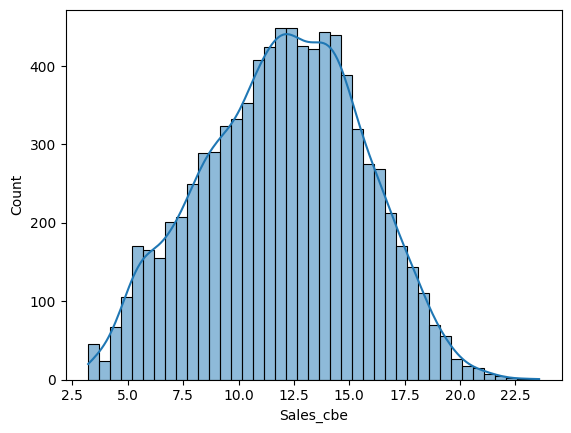

In [52]:
# Here we using the numpy library to find the cube root of the target column so that it fits the normal distribution.
train_df['Sales_cbe'] = np.cbrt(train_df['Item_Outlet_Sales'])

sns.histplot(x='Sales_cbe',data=train_df, kde=True)

In [53]:
Q1 = np.percentile(train_df['Sales_cbe'], 25)
Q3 = np.percentile(train_df['Sales_cbe'], 75)
iqr = Q3 - Q1
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", iqr)


# Calculate upper and lower limits
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr

print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

Q1: 9.41379904401278
Q3: 14.583029634673235
IQR: 5.1692305906604545
Upper limit: 22.336875520663916
Lower limit: 1.6599531580220983


* Now we could see that the normail distribution is well corrected using the cube root transformation where we intend to make the target column transform into its cube root.

* And thus we arrive at the normal distribution bell graph.

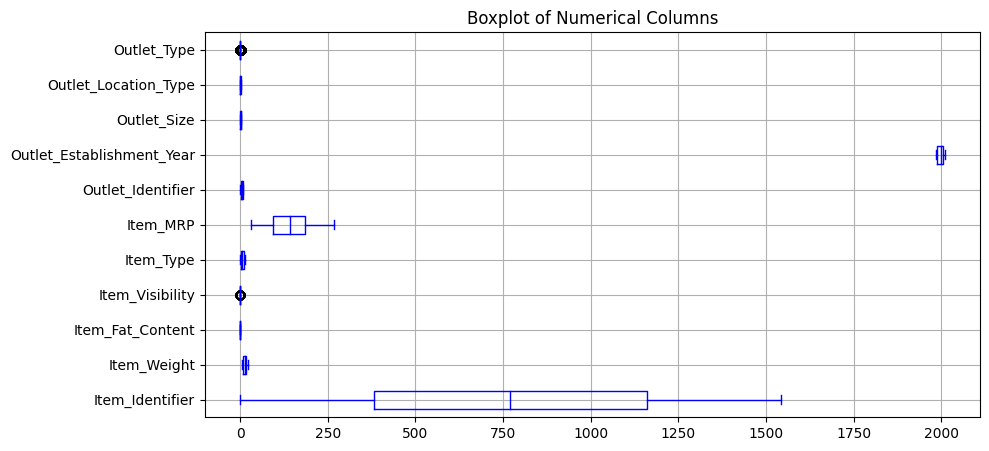

In [54]:
# IN THE TEST SET :
# Select the numerical columns
num_cols = test_df.select_dtypes(include=['int64', 'float64'])

# Create a boxplot for all the numerical columns
fig, ax = plt.subplots(figsize=(10, 5))
num_cols.boxplot(ax=ax, vert=False, color='blue') # vert=False states that the boxplot has to be in an horizontal view.
plt.title('Boxplot of Numerical Columns')
plt.show()

* The graph clearly shows that the feaures in the test set doesnt contain any significant amount of outliers with it.

**4) NORMALIZATION AND SCALING THE NUMERICAL VALUES :** 

* In order to normalize the values in the features we use the minmax scaler for the both train and the test datasets.

In [55]:
# We have to split the feature and the target columns in the training dataset :
x=train_df.iloc[:,:11]
y=train_df['Item_Outlet_Sales']

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
# Now, its ready for the standardisation process.
# Instantiate the StandardScaler object
scaler = StandardScaler()

In [58]:
x_train=scaler.fit_transform(x)
x_train=pd.DataFrame(x_train)

In [60]:
# Nextstep for the TESTING DATASET :
x_test=scaler.fit_transform(test_df)
x_test=pd.DataFrame(x_test)
# Note that the test set conatins only the features  were we need not split the target and features

# 8).BIVARIATE ANALYSIS :    

* Bivariate analysis is a statistical method that involves the analysis of the relationship between two variables. 

* It is a type of analysis that examines the association or relationship between two variables or features in a dataset. 

*  The main objective of bivariate analysis is to identify patterns and trends in the data and to understand the nature and strength of the relationship between the two variables.

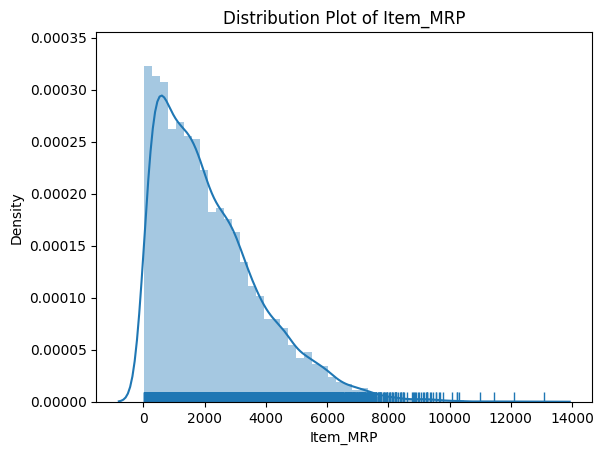

In [ ]:
# Visulaizing the Normal distribution plot using the seaborn library for the Item_MRP column.
sns.distplot(a=train['Item_Outlet_Sales'], kde=True, rug=True)

# Set the title and labels for the plot
plt.title('Distribution Plot of Item_MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Density')

# Show the plot
plt.show()

* A distplot, or distribution plot, is a graphical representation of the distribution of a continuous variable. 

* It provides a quick visual summary of the data distribution, including its central tendency, spread, and shape.

*  It is clearly seen from the above graph we have multiple peaks in it which represents that there are many subgroups present which has to be analysed.

* And also the **BELL CURVE TAIL PROLONG IN TO THE RIGHT** where it confirms the **POSITIVE SKEWNESS**.

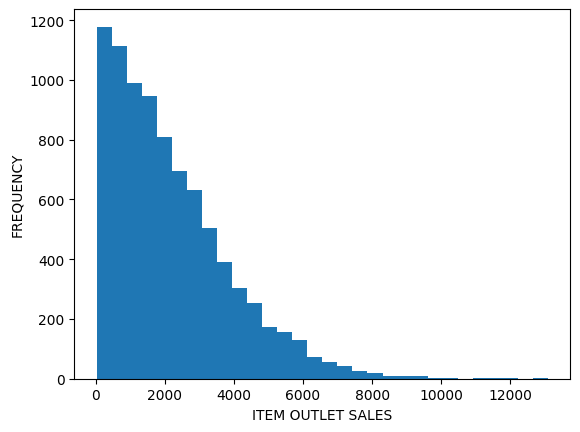

In [ ]:
# Graphing the Histogram from the Matplotlib Library for the Item Outlet Sales column.
plt.hist(train['Item_Outlet_Sales'],bins=30)

# Setting a title and labeling the x and y axses in the graph.

plt.xlabel("ITEM OUTLET SALES")
plt.ylabel("FREQUENCY")
# Visualising the graph.
plt.show()

* A histogram is a graphical representation of the distribution of a set of numerical data. 

* It consists of a series of bars or rectangles, where the area of each bar represents the frequency or count of data points that fall within a specific range or bin of values.

* From the above graph it is clearly see that the given dataset is **POSITIVELY SKEWED** which indicates that the distribution of data has a long tail on the right side.

* And Also it is seen that there are **outliers** present in the dataset which should have to be treated acoordingly.

Text(0, 0.5, 'Outlet Sales')

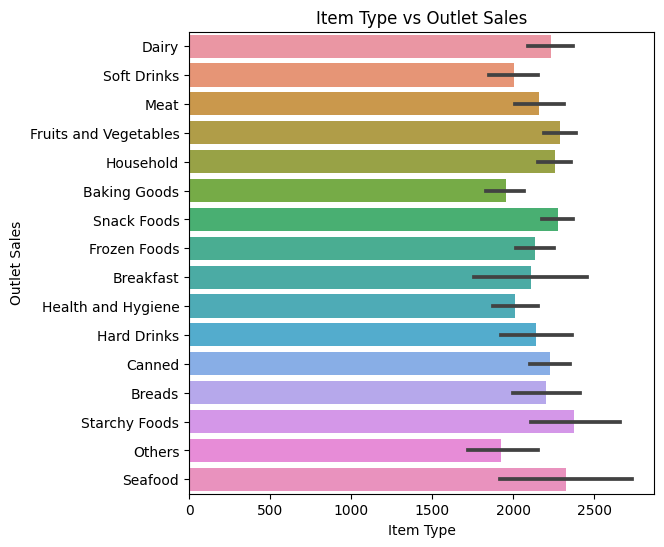

In [ ]:
# Creating a bar plot of item type vs outlet sales
plt.figure(figsize=(6,6))
sns.barplot(x='Item_Outlet_Sales', y='Item_Type', data=train).set(title="Item Type vs Outlet Sales")

# Setting the axis labels
plt.xlabel('Item Type')
plt.ylabel('Outlet Sales')

# rotate the x-axis labels to avoid overlapping
#plt.xticks(rotation=45)

* The Above represents a simple Bar Plot between the columns Item_outlet_sales and the Item_type.

* The Top three productive Item_type with the outlet sales in the dataset is listed below:
     
              1.   Strachy Food

              2.   Sea Food

              3.   Fruits and Vegetables





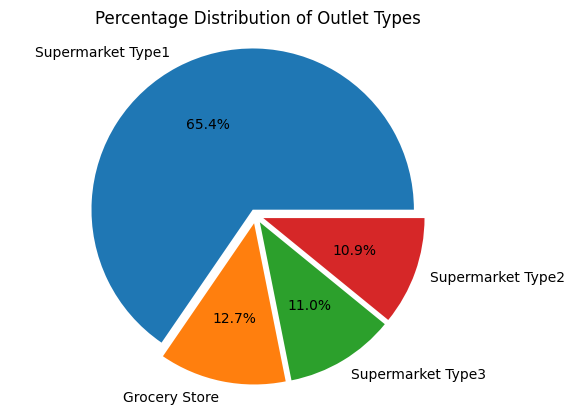

In [ ]:
# Calculate the percentage distribution of Outlet_Type categories
outlet_type_dist = train['Outlet_Type'].value_counts(normalize=True) * 100
explode = (0.04,0.05,0.05,0.05)
# Create a pie chart
plt.pie(outlet_type_dist, labels=outlet_type_dist.index, autopct='%1.1f%%',explode=explode)
plt.title('Percentage Distribution of Outlet Types')
plt.axis('equal')
plt.show()

**MULTIVARIATE ANALYSIS**

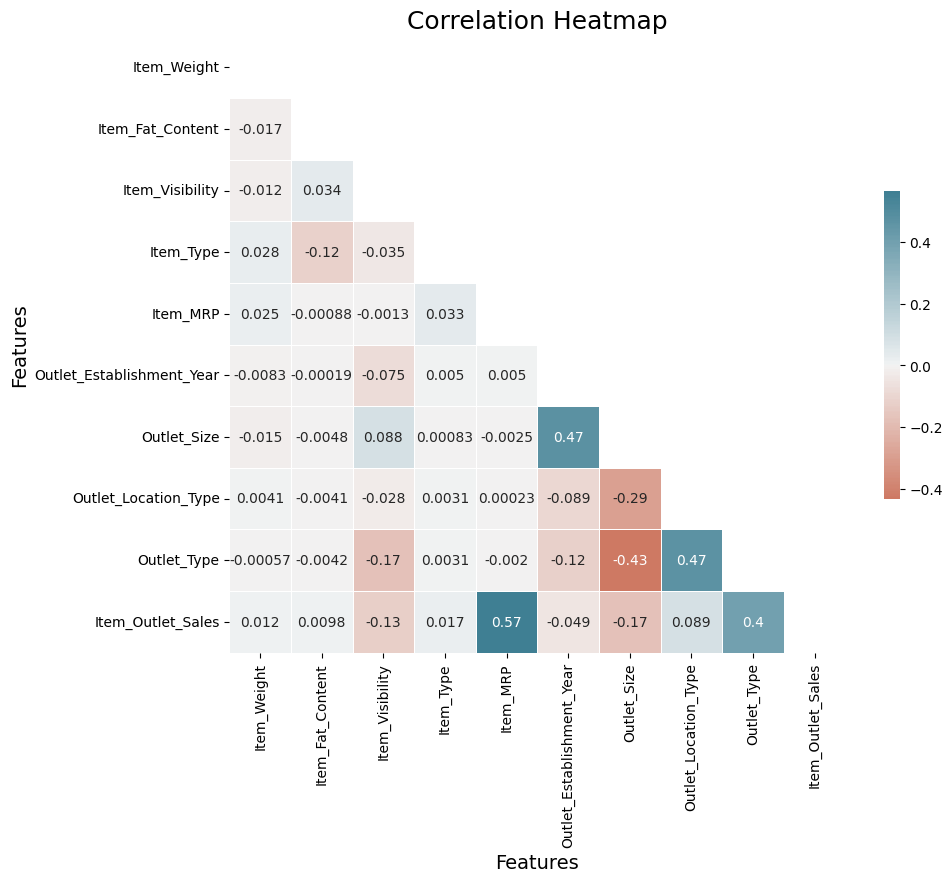

In [ ]:
# Subset the dataset to include only the relevant columns
subset = train_df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
             'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 
             'Item_Outlet_Sales']]

# Calculate the correlation matrix
corr = subset.corr()

# Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 8))

# Generate the heatmap with green and white colors
sns.heatmap(corr, mask=mask, annot=True, cmap=sns.diverging_palette(20, 220, n=200), 
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title and labels for the plot
ax.set_title("Correlation Heatmap", fontsize=18)
ax.set_xlabel("Features", fontsize=14)
ax.set_ylabel("Features", fontsize=14)

# Show the plot
plt.show()


* According to the dataset the **ITEM_OUTLET_SALES** column is considered as the target column.

* There are two most correleted features which contribute more which are **ITEM_MRP and OUTLET_TYPE (POSITIVELY CORRELATED)**

* The least were **ITEM_VISIBILITY and OUTLET_SIZE (NEGATIVELY CORRELATED)** among all the others.

# 9).FEATURE ENGINEERING :

* Feature engineering is the process of selecting and transforming variables (features) in a dataset to improve the performance of machine learning models. 

* It involves extracting important information from raw data, creating new features that may be more useful, and preparing the data for modeling.

*  Effective feature engineering can significantly improve the accuracy and robustness of machine learning models.

* We intend to create new features and remove the existing feature for a better model performance.

In [62]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Sales_cbe,Outlet_Age
0,156,9.30,0,0.016047,4,249.8092,9,1999,1.0,0,1,3735.1380,15.515611,21
1,8,5.92,1,0.019278,14,48.2692,3,2009,1.0,2,2,443.4228,7.625576,11
2,662,17.50,0,0.016760,10,141.6180,9,1999,1.0,0,1,2097.2700,12.800240,21
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3.0,2,0,732.3800,9.013888,22
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0.0,2,1,994.7052,9.982319,33


In [61]:
# Creating our new column called the Outlet_Age in  both datasets
train_df['Outlet_Age'], test_df['Outlet_Age']= train_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), test_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

# Visualizing our new column in the dataframe
train_df['Outlet_Age'].head
test_df['Outlet_Age'].head

<bound method NDFrame.head of 0       21
1       13
2       22
3       13
4       35
        ..
5676    23
5677    11
5678    18
5679    13
5680    18
Name: Outlet_Age, Length: 5681, dtype: int64>

In [63]:
# Removing the unwanted features in both the datasets

train_df  = train_df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
test_df = test_df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [64]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Sales_cbe,Outlet_Age
0,9.30,0,0.016047,249.8092,1.0,0,3735.1380,15.515611,21
1,5.92,1,0.019278,48.2692,1.0,2,443.4228,7.625576,11
2,17.50,0,0.016760,141.6180,1.0,0,2097.2700,12.800240,21
3,19.20,1,0.000000,182.0950,3.0,2,732.3800,9.013888,22
4,8.93,0,0.000000,53.8614,0.0,2,994.7052,9.982319,33


In [65]:
test_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Age
0,20.750000,0,0.007565,107.8622,1.0,0,21
1,8.300000,1,0.038428,87.3198,3.0,1,13
2,14.600000,0,0.099575,241.7538,3.0,2,22
3,7.315000,0,0.015388,155.0340,3.0,1,13
4,12.695633,1,0.118599,234.2300,1.0,2,35


# 10).BUILDING THE MODEL :    

* The goal of building a model is to develop a predictive tool that can generalize well to new, unseen data and provide insights into the underlying patterns and relationships in the data.

**1).USING SIMPLE LINEAR REGRESSION ALGORITHM :** 

In [68]:
# Define the linear regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(x_train, y)

# Precting the model using the test set
y_predict = lr.predict(x_test)

# Evaluating the training set with the metric values

print("R-Square value on the training set: = ", lr.score(x_train,y))
print("----------------------------------------------------------------------------------------------")

# Use cross-validation to get the R-squared score
scores = CVS(lr, x_train, y, cv=5)
print('CV R-squared scores:', scores,"\n")
print('Average CV R-squared score:', np.mean(scores),"\n")

R-Square value on the training set: =  0.5020848631756696
----------------------------------------------------------------------------------------------
CV R-squared scores: [0.51597924 0.50500818 0.48220973 0.49786883 0.49820028] 

Average CV R-squared score: 0.4998532520983418 



**2).USING RANDOM FOREST ALGORITHM :**

In [70]:
# Create a random forest regressor model
rfr = RandomForestRegressor()

# Train the model on the training data
rfr.fit(x_train, y)

# Precting the model using the test set
y_predict = rfr.predict(x_test)

# Evaluating the training set with the metric values

print("R-Square value on the training set: = ", rfr.score(x_train,y))
print("----------------------------------------------------------------------------------------------")

# Use cross-validation to get the R-squared score
scores = CVS(rfr, x_train, y, cv=5)
print('CV R-squared scores:', scores,"\n")
print('Average CV R-squared score:', np.mean(scores),"\n")

R-Square value on the training set: =  0.938082534498599
----------------------------------------------------------------------------------------------
CV R-squared scores: [0.57060975 0.53914104 0.52313938 0.55375617 0.56067995] 

Average CV R-squared score: 0.5494652585823516 



**3).USING THE LASSO REGRESSION ALGORITHM :**


In [71]:
# Create a lasso regressor model
ls = Lasso(alpha=0.1)

# Train the model on the training data
ls.fit(x_train, y)

# Precting the model using the test set
y_predict = ls.predict(x_test)

# Evaluating the training set with the metric values

print("R-Square value on the training set: = ", ls.score(x_train,y))
print("----------------------------------------------------------------------------------------------")

# Use cross-validation to get the R-squared score
scores = CVS(ls, x_train, y, cv=5)
print('CV R-squared scores:', scores,"\n")
print('Average CV R-squared score:', np.mean(scores),"\n")

R-Square value on the training set: =  0.5020848229815729
----------------------------------------------------------------------------------------------
CV R-squared scores: [0.51597156 0.5050119  0.48221059 0.49789269 0.49821404] 

Average CV R-squared score: 0.4998601545956037 



# 11).SAVING THE MODEL :     


In [72]:
import pickle

In [74]:
Bigmart= "BigMart_Analysis.sav"
pickle.dump(rfr, open(Bigmart,'wb'))
# Since rfr has a good accuracy as compared with others the random model has been saved and not the others.

# 12).SUMMARY :     

* In this BigMart Sales Analysis project, we started by exploring and cleaning the dataset. We checked for missing values, duplicates, and outliers in the data and handled them accordingly. 

*  We also did some feature engineering to extract useful information from the given features.

* After preprocessing the data, the training and testing sets were applied  to the linear regression, Random Forest, lasso regression algorithms to build our regression model.

* We evaluated our model's performance using various metrics such as R-squared, and Cross validation scores. We also visualized the feature importance using a heat map.

* We also made some important observations from the feature importance plot. Item_MRP, Outlet_Type, and Item_Outlet_Sales were the most important features for predicting the sales.

* In conclusion, this project involved data cleaning, feature engineering, model building, and evaluation using various metrics. We successfully built a Random Forest regression model to predict the sales of BigMart stores with an accuracy of 0.54 approximately.

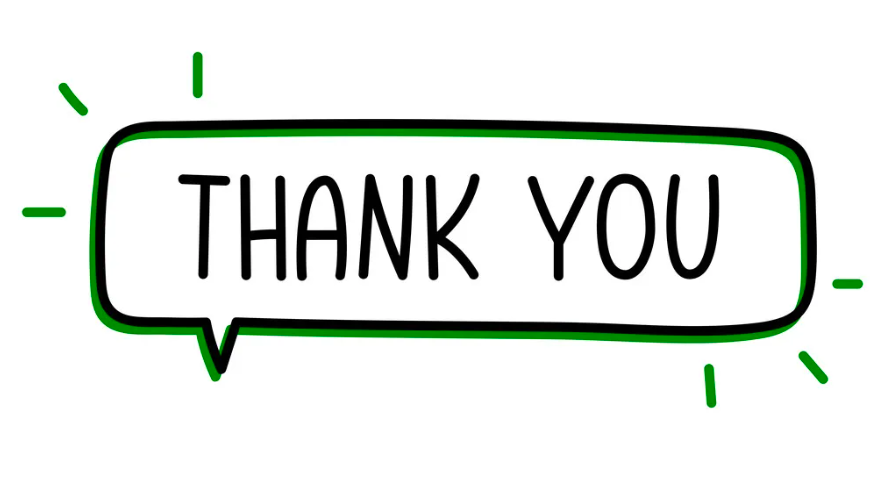